In [39]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for file IO
import os.path

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime
import time

In [4]:
dsl_dir01 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/SOG_01jun2017_08jun2017/';
dsl_dir02 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/SOG_05jun2015_15jun2015/';
dsl_dir03 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/SOG_15jan2018_22jan2018/';
dsl_dir04 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/SB_01aug2017_08aug2017/';
dsl_dir05 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/SB_07dec2018_14dec2018/';
dsl_dir06 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/TP_21nov2017_28nov2017/';
dsl_dir07 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/LightEvaporator/TP_21nov2017_28nov2017/';

akns_dir01 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/SOG_01jun2017_08jun2017/';
akns_dir02 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/SOG_05jun2015_15jun2015/';
akns_dir03 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/SOG_15jan2018_22jan2018/';
akns_dir04 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/SB_01aug2017_08aug2017/';
akns_dir05 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/SB_07dec2018_14dec2018/';
akns_dir06 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/TP_21nov2017_28nov2017/';
akns_dir07 = '/Users/rmueller/Projects/MIDOSS/results/DT_1200/MediumFloater/TP_21nov2017_28nov2017/';

In [5]:
akns_nc01 = 'Lagrangian_AKNS_crude_SOG_01jun2017_08jun2017.nc';
akns_nc02 = 'Lagrangian_AKNS_crude_SOG_05jun2015_15jun2015.nc';
akns_nc03 = 'Lagrangian_AKNS_crude_SOG_15jan2018_22jan2018_1200b.nc';
akns_nc04 = 'Lagrangian_AKNS_crude_SB_01aug2017_08aug2017.nc';
akns_nc05 = 'Lagrangian_AKNS_crude_SB_07dec2018_14dec2018.nc';
akns_nc06 = 'Lagrangian_AKNS_crude_TP_21nov2017_28nov2017.nc';
akns_nc07 = 'Lagrangian_AKNS_crude_TP_15jun2017_22jun2017.nc';

dsl_nc01 = 'Lagrangian_DieselFuel_refined_SOG_01jun2017_08jun2017_Diesel.nc';
dsl_nc02 = 'Lagrangian_DieselFuel_refined_SOG_SOG_05jun2015_12jun2015_Diesel.nc';
dsl_nc03 = 'Lagrangian_DieselFuel_refined_SOG_15jan2018_22jan2018_Diesel.nc';  
dsl_nc04 = 'Lagrangian_DieselFuel_refined_SB_01aug2017_08aug2017_Diesel.nc';
dsl_nc05 = 'Lagrangian_DieselFuel_refined_SB_07dec2018_14dec2018_Diesel.nc';
dsl_nc06 = 'Lagrangian_DieselFuel_refined_TP_21nov2017_28nov2017_Diesel.nc';
dsl_nc07 = 'Lagrangian_DieselFuel_refined_TP_15jun2017_22jun2017_Diesel.nc';

title_SOG = ['SOG 01/06/17 - 08/06/17', 'SOG 05/06/15 - 15/06/15', 'SOG 15/01/18 - 22/01/18']
title_TP = ['TP 21/11/17 - 28/11/17', 'TP 15/06/17 - 22/06/17']; file_num_TP = ['06','07']
title_SB = ['SB 01/08/17 - 08/08/17', 'SB 07/12/18 - 14/12/18']; file_num_SB = ['04','05']

In [6]:
beachtime = xr.open_dataset(akns_dir01 + akns_nc01)

In [41]:
beachtime_np = beachtime.Beaching_Time.values
beachtime_np_flat = beachtime_np.flatten()
#elapsed = beachtime_np_flat[-1] - datetime('01 june 2017')
beachtime_np_flat.shape

(354816,)

In [45]:
beachtime_np_flat[0]

numpy.datetime64('2017-06-01T00:30:00.000000000')

In [135]:
(beachtime_np_flat[0]-np.datetime64('2017-06-01T00:30:00')).item()*1e-9/86400
beachtime_np_flat.shape

(354816,)

In [144]:
# list comprehension
test = [(ii - np.datetime64('2017-06-01T00:30:00')).item()*1e-9/86400 for ii in beachtime_np_flat ]
# if (ii - np.datetime64('2017-06-01T00:30:00')).item is not 0 

In [141]:
days2beaching = np.asarray(test)

In [145]:
test[0]

0.0

In [131]:
# loop through all values and extract non-zero ones
days2beaching_nonzero = []
index = range(0,days2beaching.size)
for ii in index:
    if days2beaching[ii] is not 0.0 and count < 5:
        print(days2beaching[ii])
        count += 1
        days2beaching_nonzero.append(days2beaching[ii])

5.69444444444
5.5
6.31944444444
5.90277777778
6.66666666667


In [132]:
days2beaching_nonzero.shape

AttributeError: 'list' object has no attribute 'shape'

In [70]:
np.max(days2beaching) - np.min(test)

596400.0

(array([ 0.,  0.,  0.,  0.,  0.,  3.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

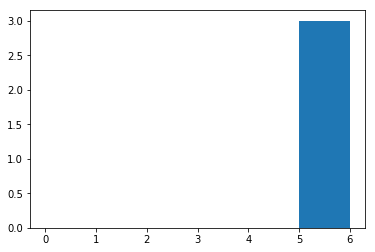

In [148]:
plt.hist(days2beaching_nonzero, bins=range(0,7,1))


In [12]:
test = np.datetime64(beachtime_np_flat[1])
test

numpy.datetime64('2017-06-01T00:30:00.000000000')